In [2]:
import numpy as np
import pandas as pd
import sys 
import os
import nibabel as nib
import matplotlib.pyplot as plt
import glob 

In [3]:
Train_Labeled = "/home/dang.cpm/__MY_SPACE__/MICCAI/Dataset/Train_Labeled"
Train_Unlabeled = "/home/dang.cpm/__MY_SPACE__/MICCAI/Dataset/Train_Unlabeled"
Validation = "/home/dang.cpm/__MY_SPACE__/MICCAI/Dataset/Validation"

In [7]:
images = glob.glob(os.path.join(Train_Labeled, "Images", "*.nii.gz"))
masks = glob.glob(os.path.join(Train_Labeled, "Masks", "*.nii.gz"))
img = nib.load(images[20])
data = img.get_fdata() # Get the image data as a numpy array
print(data.shape)

(640, 640, 400)


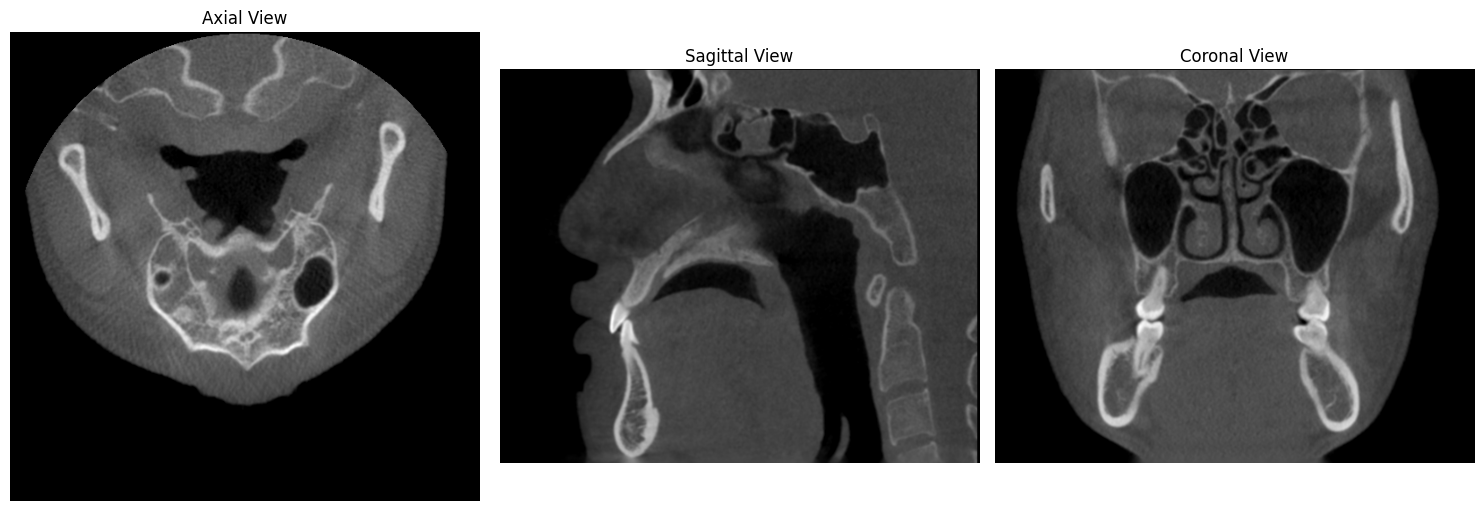

In [5]:
# Create a figure with three subplots for axial, sagittal, and coronal views
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial view (x-y plane, slicing along z-axis)
axial_slice = data[:, :, data.shape[2] // 2]  # Middle slice along z
axes[0].imshow(axial_slice.T, cmap='gray', origin='lower')
axes[0].set_title('Axial View')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].axis('off')

# Sagittal view (y-z plane, slicing along x-axis)
sagittal_slice = data[data.shape[0] // 2, :, :]  # Middle slice along x
axes[1].imshow(sagittal_slice.T, cmap='gray', origin='lower')
axes[1].set_title('Sagittal View')
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
axes[1].axis('off')

# Coronal view (x-z plane, slicing along y-axis)
coronal_slice = data[:, data.shape[1] // 2, :]  # Middle slice along y
axes[2].imshow(coronal_slice.T, cmap='gray', origin='lower')
axes[2].set_title('Coronal View')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Z')
axes[2].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

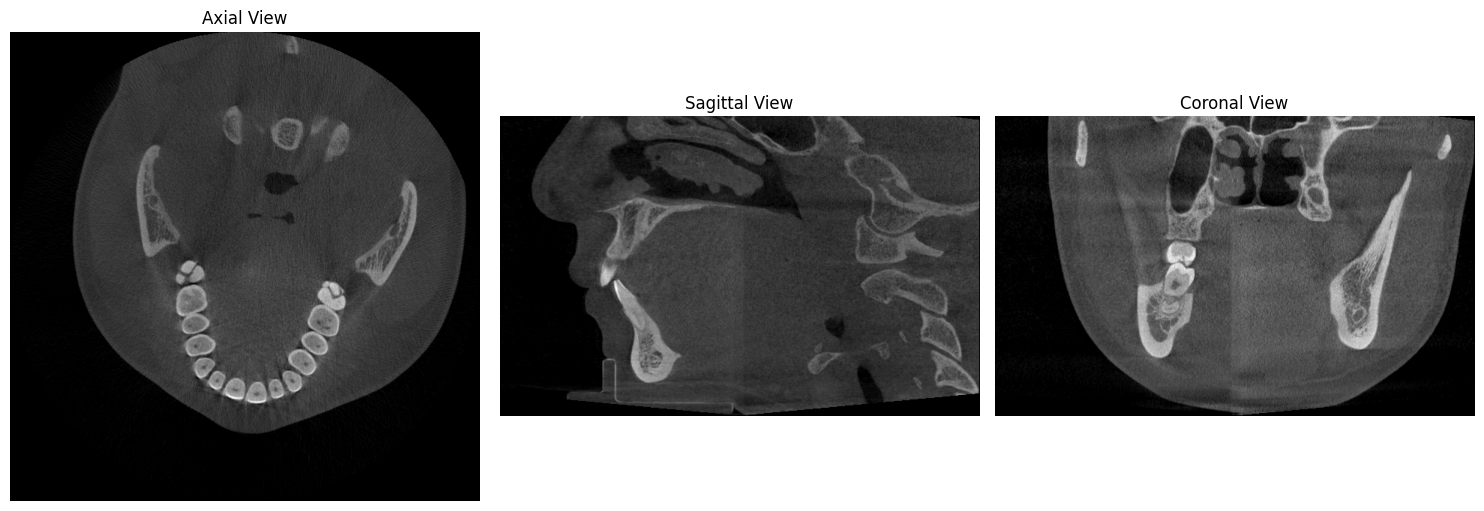

In [8]:
# Create a figure with three subplots for axial, sagittal, and coronal views
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Axial view (x-y plane, slicing along z-axis)
axial_slice = data[:, :, data.shape[2] // 2]  # Middle slice along z
axes[0].imshow(axial_slice.T, cmap='gray', origin='lower')
axes[0].set_title('Axial View')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].axis('off')

# Sagittal view (y-z plane, slicing along x-axis)
sagittal_slice = data[data.shape[0] // 2, :, :]  # Middle slice along x
axes[1].imshow(sagittal_slice.T, cmap='gray', origin='lower')
axes[1].set_title('Sagittal View')
axes[1].set_xlabel('Y')
axes[1].set_ylabel('Z')
axes[1].axis('off')

# Coronal view (x-z plane, slicing along y-axis)
coronal_slice = data[:, data.shape[1] // 2, :]  # Middle slice along y
axes[2].imshow(coronal_slice.T, cmap='gray', origin='lower')
axes[2].set_title('Coronal View')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Z')
axes[2].axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()